# HT 6. MRLog

## Miembros
- Fabian Estuardo Juarez Tello 21440
- Diego Estuardo Lemus Lopez 21469

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/TheDeloz-v2/MD-HT6.git)

## Link al documento
El documento puede ser visualizado [acá]()

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
from sklearn.exceptions import FitFailedWarning

## Análisis exploratorio de los datos

In [144]:
datos = pd.read_csv('train.csv')
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [145]:
le = LabelEncoder()
datos["MSZoning"] = le.fit_transform(datos["MSZoning"])
datos["Street"] = le.fit_transform(datos["Street"])
datos["Alley"] = le.fit_transform(datos["Alley"])
datos["LotShape"] = le.fit_transform(datos["LotShape"])
datos["LandContour"] = le.fit_transform(datos["LandContour"])
datos["Utilities"] = le.fit_transform(datos["Utilities"])
datos["LotConfig"] = le.fit_transform(datos["LotConfig"])
datos["LandSlope"] = datos["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
datos["Neighborhood"] = le.fit_transform(datos["Neighborhood"])
datos["Condition1"] = le.fit_transform(datos["Condition1"])
datos["Condition2"] = le.fit_transform(datos["Condition2"])
datos["BldgType"] = le.fit_transform(datos["BldgType"])
datos["HouseStyle"] = le.fit_transform(datos["HouseStyle"])
datos["RoofStyle"] = le.fit_transform(datos["RoofStyle"])
datos["RoofMatl"] = le.fit_transform(datos["RoofMatl"])
datos["Exterior1st"] = le.fit_transform(datos["Exterior1st"])
datos["Exterior2nd"] = le.fit_transform(datos["Exterior2nd"])
datos["MasVnrType"] = le.fit_transform(datos["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
datos["ExterQual"] = datos["ExterQual"].map(condition_map)
datos["ExterCond"] = datos["ExterCond"].map(condition_map)
datos["Foundation"] = le.fit_transform(datos["Foundation"])
datos["BsmtQual"] = datos["BsmtQual"].map(condition_map)
datos["BsmtCond"] = datos["BsmtCond"].map(condition_map)
datos["BsmtExposure"] = datos["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
datos["BsmtFinType1"] = datos["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["BsmtFinType2"] = datos["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["Heating"] = le.fit_transform(datos["Heating"])
datos["HeatingQC"] = datos["HeatingQC"].map(condition_map)
datos["CentralAir"] = le.fit_transform(datos["CentralAir"])
datos["Electrical"] = datos["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
datos["KitchenQual"] = datos["KitchenQual"].map(condition_map)
datos["Functional"] = le.fit_transform(datos["Functional"])
datos["FireplaceQu"] = datos["FireplaceQu"].map(condition_map)
datos["GarageType"] = le.fit_transform(datos["GarageType"])
datos["GarageFinish"] = datos["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["GarageQual"] = datos["GarageQual"].map(condition_map)
datos["GarageCond"] = datos["GarageCond"].map(condition_map)
datos["PavedDrive"] = datos["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
datos["PoolQC"] = datos["PoolQC"].map(condition_map)
datos["Fence"] = datos["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
datos["MiscFeature"] = le.fit_transform(datos["MiscFeature"])
datos["SaleType"] = le.fit_transform(datos["SaleType"])
datos["SaleCondition"] = le.fit_transform(datos["SaleCondition"])


In [146]:
columns_with_na = datos.isna().any()
# Recorrer todas las columnas y rellenar con 0 donde sea necesario
for column in columns_with_na.index:
    if columns_with_na[column]:
        datos[column] = datos[column].fillna(0)

In [147]:
# Definir los límites de las categorías basadas en los percentiles
bins = datos['SalePrice'].quantile([0, 0.33, 0.66, 1]).values

# Crear las categorías
datos['CategoriaPrecio'] = pd.cut(datos['SalePrice'], bins, labels=['Bajo', 'Medio', 'Alto'], include_lowest=True)


In [148]:
# Crear variables dicotómicas
datos['EsCara'] = (datos['CategoriaPrecio'] == 'Alto').astype(int)
datos['EsMedia'] = (datos['CategoriaPrecio'] == 'Medio').astype(int)
datos['EsEconomica'] = (datos['CategoriaPrecio'] == 'Bajo').astype(int)

# Mostrar las primeras filas para verificar el resultado
print(datos[['CategoriaPrecio', 'EsCara', 'EsMedia', 'EsEconomica']].head())


  CategoriaPrecio  EsCara  EsMedia  EsEconomica
0            Alto       1        0            0
1           Medio       0        1            0
2            Alto       1        0            0
3           Medio       0        1            0
4            Alto       1        0            0


In [149]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.linear_model import LogisticRegression
features = datos.select_dtypes(include=[np.number])

# Eliminar cualquier fila con valores perdidos
features = features.dropna()

# Definir la variable objetivo
target = features['EsCara']

# Eliminar la variable objetivo de las características
features = features.drop('EsCara', axis=1)

# Normalizar las características
scaler = StandardScaler()
features = scaler.fit_transform(features)

X = datos.drop(columns=["Id", "SalePrice", "CategoriaPrecio", "EsCara", "EsMedia", "EsEconomica"])
y = datos["EsCara"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
scores = cross_val_score(model, X_test, y_test, cv=5)
print('Precisión media: ', np.mean(scores))

# Imprimir el informe de clasificación
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
warnings.filterwarnings("default", category=FitFailedWarning)
warnings.filterwarnings("default", category=UserWarning)

Precisión media:  0.8697837521917009
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       197
           1       0.96      0.73      0.83        95

    accuracy                           0.90       292
   macro avg       0.92      0.86      0.88       292
weighted avg       0.91      0.90      0.90       292



### INCISO 4

In [150]:
X_train_const = add_constant(X_train)

vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

vif_data['feature'] = X_train_const.columns
print(vif_data)

c:\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             VIF        feature
0   2.599763e+06          const
1   5.533222e+00     MSSubClass
2   1.400416e+00       MSZoning
3   1.402632e+00    LotFrontage
4   1.776529e+00        LotArea
..           ...            ...
75  1.693587e+00        MiscVal
76  1.096128e+00         MoSold
77  1.103613e+00         YrSold
78  1.164254e+00       SaleType
79  1.247673e+00  SaleCondition

[80 rows x 2 columns]


In [151]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
logt_model = sm.Logit(y_train, X_train_const)
logt_result = logt_model.fit()

print(logt_result.summary())
warnings.filterwarnings("default", category=FitFailedWarning)
warnings.filterwarnings("default", category=UserWarning)

         Current function value: 0.175716
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 EsCara   No. Observations:                 1168
Model:                          Logit   Df Residuals:                     1088
Method:                           MLE   Df Model:                           79
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                  0.7271
Time:                        16:20:36   Log-Likelihood:                -205.24
converged:                      False   LL-Null:                       -751.92
Covariance Type:            nonrobust   LLR p-value:                3.161e-178
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -278.1675    219.475     -1.267      0.205    -708.330     151.995
MSSubClass       -0.0269      0.014     -1.882      0.06

In [152]:

X_test_const = add_constant(X_test)

y_pred = logt_result.predict(X_test_const)

#Se calcula la precisión y el AUC con las predicciones
accuracy = accuracy_score(y_test, y_pred.round())
auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

Accuracy: 0.9212328767123288
AUC: 0.9803900614480363


Las variables MSSubClass, MSZoning, LotFrontage, LotArea, y otras listadas, tienen un VIF menor a 10, lo que indica que no hay problemas graves de multicolinealidad.

Variables como MSZoning (P=0.013) y LotShape (P=0.046) son estadísticamente significativas ya que sus valores p son menores a 0.05, lo que indica que tienen un impacto significativo en el modelo.
Otras variables como LotFrontage (P=0.413) y Street (P=0.779) tienen valores p más altos, lo que sugiere que podrían no ser significativas para el modelo.
    
El modelo tiene un Pseudo R-squ. de 0.7271, lo cual es relativamente alto, indicando que el modelo ajusta bien los datos. Sin embargo, hay una advertencia de que el máximo número de iteraciones ha sido excedido, lo cual puede indicar problemas en la convergencia del modelo.

La precisión (Accuracy) del modelo es 0.9212 y el Área bajo la Curva ROC (AUC) es 0.9804, ambas métricas sugieren que el modelo tiene un buen rendimiento en los datos de prueba.

### INCISO 5

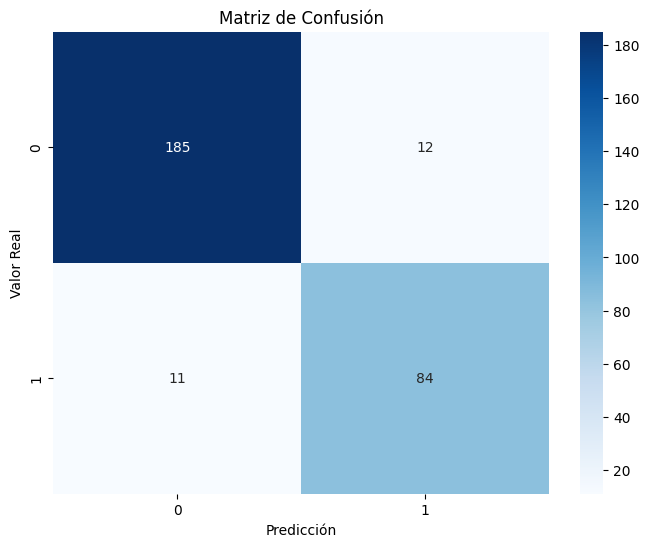

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       197
           1       0.88      0.88      0.88        95

    accuracy                           0.92       292
   macro avg       0.91      0.91      0.91       292
weighted avg       0.92      0.92      0.92       292



In [153]:
# Suponiendo que ya tienes X_test, y_test, y logt_result
X_test_const = add_constant(X_test)
y_pred = logt_result.predict(X_test_const)

# Redondear las predicciones para obtener valores binarios
y_pred_round = y_pred.round()

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_round)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

class_report = classification_report(y_test, y_pred.round())

print('Reporte de clasificación:')
print(class_report)

La matriz de confusión demuestra que el modelo clasificó correctamente 84 de los casos positivos y 185 de los casos negativos. Hubo 12 casos donde se predijo incorrectamente un resultado positivo (FP) y 11 casos donde se predijo incorrectamente un resultado negativo (FN).

Para la clase 0 (negativa), la precisión es 0.94, y para la clase 1 (positiva), es 0.88. Esto significa que el modelo es muy preciso en la predicción de ambas clases, siendo ligeramente mejor al predecir la clase negativa. Los valores anteriores se repiten en el caso de la sensibilidad,  indicando que el modelo es bueno en la identificación de verdaderos positivos y verdaderos negativos.

Los F1-Scores equilibrados también sugieren que el modelo es equilibrado y efectivo para clasificar ambas clases. Esto refleja un algoritmo de clasificación robusto y confiable para este conjunto de datos específico.

### INCISO 6

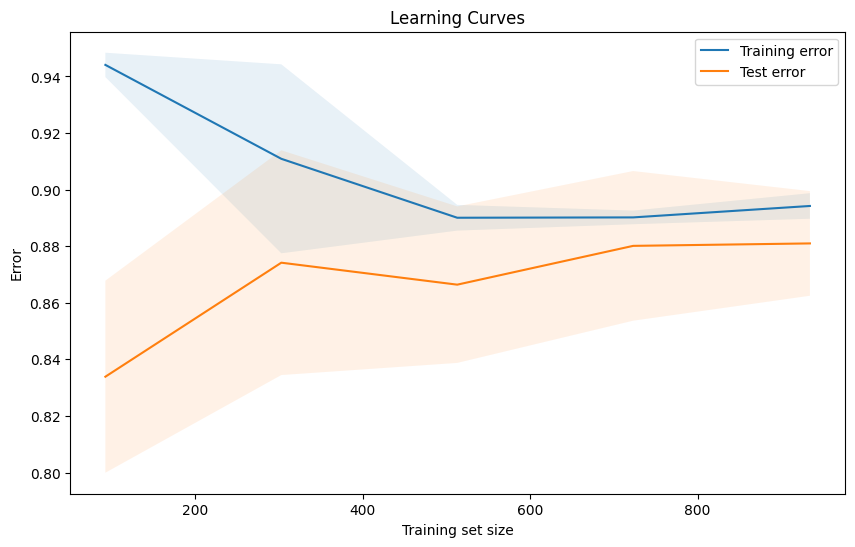

In [154]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
model_log = LogisticRegression()

train_sizes, train_scores, test_scores = learning_curve(model_log, X_train, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Test error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.title('Learning Curves')
plt.legend()
plt.show()
warnings.filterwarnings("default", category=FitFailedWarning)
warnings.filterwarnings("default", category=UserWarning)

Las curvas de error de entrenamiento y prueba parecen estar convergiendo a medida que aumenta el tamaño del conjunto de entrenamiento. Esto es una buena señal de que el modelo generaliza bien y no hay evidencia clara de sobreajuste, ya que el error de prueba no está aumentando a medida que aumenta el tamaño de los datos de entrenamiento.

No hay signos claros de sobreajuste en el modelo, ya que las curvas de error de entrenamiento y prueba son consistentes y convergentes. El modelo parece tener un buen rendimiento tanto en los conjuntos de entrenamiento como de prueba, indicando que es capaz de generalizar bien desde los datos de entrenamiento a los datos no vistos. Esto se considera un signo de un modelo bien ajustado.

### INCISO 7

In [155]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
warnings.filterwarnings("default", category=FitFailedWarning)
warnings.filterwarnings("default", category=UserWarning)


Best Parameters:  {'C': 10, 'penalty': 'l2'}
Best Score:  0.8852830050254943


### INCISO 8

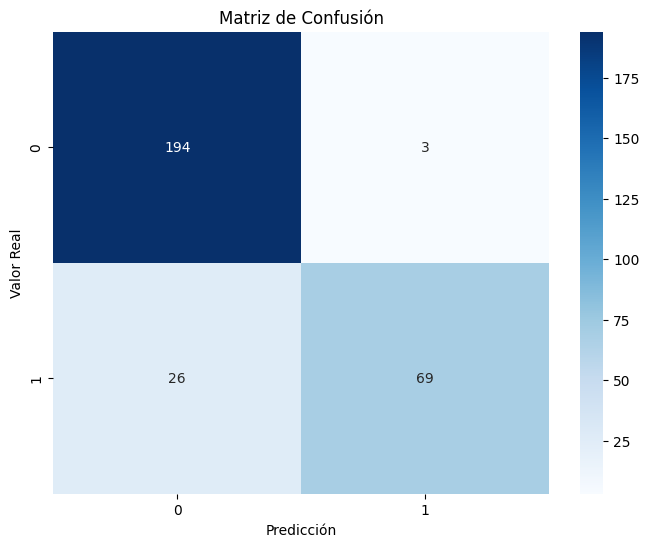

Efectividad del algoritmo: 90.07%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       197
           1       0.96      0.73      0.83        95

    accuracy                           0.90       292
   macro avg       0.92      0.86      0.88       292
weighted avg       0.91      0.90      0.90       292

Uso de memoria: 0.00 MiB


In [173]:

import cProfile, pstats, io
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
model.fit(X_train, y_train)

# Usar el modelo ajustado para hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Efectividad del algoritmo: {accuracy * 100:.2f}%")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

def run_model():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

# Inicia el perfilador
profiler = cProfile.Profile()
profiler.enable()

# Detiene el perfilador
profiler.disable()

# Imprimiendo estadísticas de tiempo
stats = pstats.Stats(profiler, stream=io.StringIO())
stats.sort_stats("cumulative")
stats.print_stats()
# Imprimiendo uso de memoria
print(f"Uso de memoria: {max(mem_usage) - min(mem_usage):.2f} MiB")

warnings.filterwarnings("default", category=FitFailedWarning)
warnings.filterwarnings("default", category=UserWarning)